# Introduction
*Kamil Wojtowicz | Faculty of Psychology and Cognitive Sciences | Adam Mickiewicz University*

This file contains Airline Passenger Satisfaction Dataset analysis as a part of Data Analisys and Visualisation Course.

Dataset source: https://www.kaggle.com/datasets/iamsouravbanerjee/airline-dataset

In [78]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scikit_posthocs import posthoc_dunn

In [79]:
np.random.seed(38)  

aps_df = pd.read_csv("Airline_Passenger_Satisfaction_Dataset.csv")

lhs_palette = {
    'neutral or dissatisfied': '#05164D',  
    'satisfied': '#FFAD00',
    'Male': '#05164D',
    'Female': '#FFAD00',
    'Eco Plus': '#05164D', 
    'Eco': '#FFAD00',
    'Business': '#d3d3d3',
    'Loyal Customer': '#05164D',
    'disloyal Customer': '#FFAD00'
}

plt.rcParams['font.family'] = 'Helvetica' 
plt.rcParams['font.size'] = 14            
font_color = '#000000'      

# Research questions
---
## 1. Are business travelers more likely to be satisfied?
### Variables
- **Type of Travel**: Nominal
- **Satisfaction**: Nominal
### Tests
- **Chi-squared test** - Group comparasion
---
## 2. Is there an age difference between satisfied and neutral/unsatisfied customers?
### Variables
- **Age**: Quantitive
- **Satisfaction**: Nominal
### Tests
- **Shapiro–Wilk test / Anderson–Darling test** - Normality verification
- **Student's t-test / Mann–Whitney U test** - Group comparasion
--- 
## 3. Do women find the seats more comfortable than men?
### Variables
- **Gender**: Nominal
- **Seat comfort**: Quantitive
### Tests
- **Shapiro–Wilk test / Anderson–Darling test** - Normality verification
- **Student's t-test / Mann–Whitney U test** - Group comparasion
--- 
## 4. Does the rating of the ease of use of the online booking system decrease with the age of the passengers? 
### Variables
- **Ease of Online booking**: Ordinal
- **Age**: Quantitive
### Tests
- **Shapiro–Wilk test / Anderson–Darling test** - Normality verification
- **Pearson correlation / Spearman's rank correlation** - Correlation
--- 
## 5. Does the leg room rating decrease as the flight distance increases?
### Variables
- **Flight distance**: Quantitive
- **Leg room service**: Ordinal
### Tests
- **Shapiro–Wilk test / Anderson–Darling test** - Normality verification
- **Pearson correlation / Spearman's rank correlation** - Correlation
--- 
## 6. Are there significant differences in the rating of in-flight services between Business, Economy and Economy Plus class passengers?
### Variables
- **Inflight service**: Ordinal
- **Class**: Nominal
### Tests
- **Shapiro–Wilk test / Anderson–Darling test** - Normality verification
- **ANOVA / Kruskal-Wallis test** - Group comparasion
--- 
## 7. Does the check-in rating differ between loyal and disloyal customers travelling in business class?
### Variables
- **Check-in service**: Ordinal
- **Customer Type**: Nominal
### Tests
- **Shapiro–Wilk test / Anderson–Darling test** - Normality verification
- **Student's t-test / Mann–Whitney U test** - Group comparasion
--- 

In [80]:
len(aps_df)

103904

# 1. Are business travelers more likely to be satisfied?

In [81]:
aps_df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [82]:
aps_df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [83]:
crosstab = pd.crosstab(aps_df['Type of Travel'], aps_df['satisfaction'])
crosstab

satisfaction,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,29909,41746
Personal Travel,28970,3279


In [84]:
stats.chi2_contingency(crosstab)
# p < 0.05 -> H0 rejected, satisfaction differes between type of travalers

Chi2ContingencyResult(statistic=20945.233826061667, pvalue=0.0, dof=1, expected_freq=array([[40604.54597513, 31050.45402487],
       [18274.45402487, 13974.54597513]]))

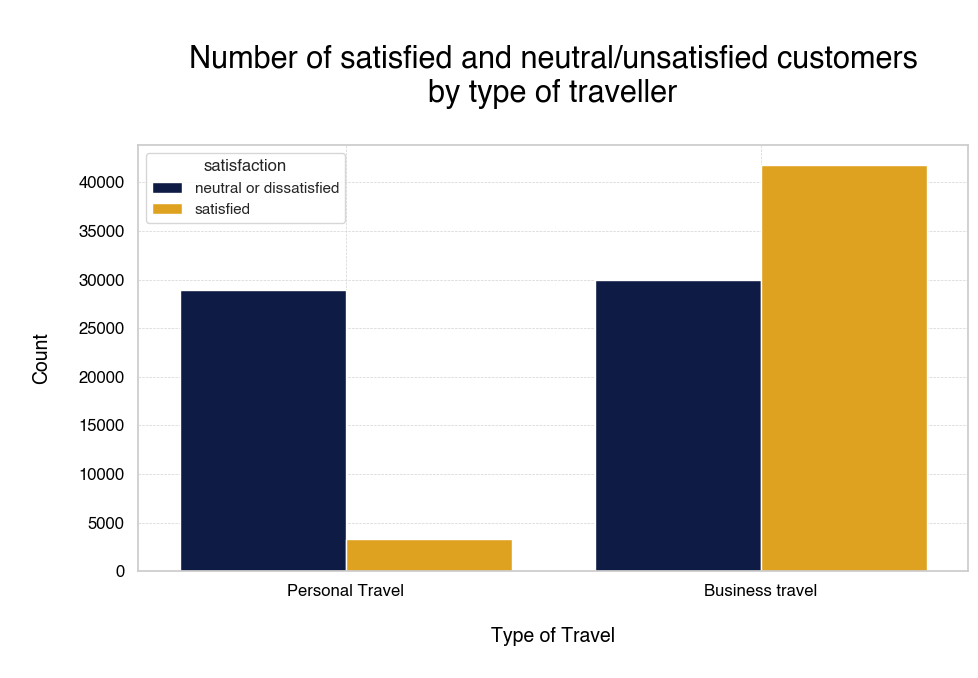

In [85]:
plt.figure(figsize=(10, 7))
sns.countplot(data=aps_df, x="Type of Travel", hue="satisfaction", palette=lhs_palette)

plt.title("\nNumber of satisfied and neutral/unsatisfied customers\nby type of traveller\n", fontsize=22, color=font_color, weight='bold')
plt.xlabel("\nType of Travel\n", fontsize=14, color=font_color)
plt.ylabel("\nCount\n", fontsize=14, color=font_color)

plt.xticks(color=font_color, fontsize=12)
plt.yticks(color=font_color, fontsize=12)
plt.grid(color='#D3D3D3', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.show()

# 2. Is there an age difference between satisfied and neutral/unsatisfied customers?


In [86]:
aps_df['Age'].unique()

array([13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38,  9, 17, 43,
       58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54,
       21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16,
       11, 62,  8, 56, 68, 55, 18, 65, 72, 70, 63, 10,  7, 14, 80, 74, 71,
       85, 73, 76, 77, 75, 79, 78])

In [87]:
aps_df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [88]:
aps_df_satisfied = aps_df[aps_df['satisfaction'] == "satisfied"]['Age']
aps_df_neutral_dissatisfied = aps_df[aps_df['satisfaction'] == "neutral or dissatisfied"]['Age']

In [89]:
stats.shapiro(aps_df_satisfied)
# Shpairo gives UserWarning: For N > 5000, computed p-value may not be accurate. Current N is 58879. Verifying normality using Anderson–Darling test
stats.anderson(aps_df_satisfied, dist="norm") # it's greater than the critical leve, rejeting H0 normal distribution


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45025.
  res = hypotest_fun_out(*samples, **kwds)


AndersonResult(statistic=232.6036578217172, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=41.750583009439204, scale=12.767833389271697)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

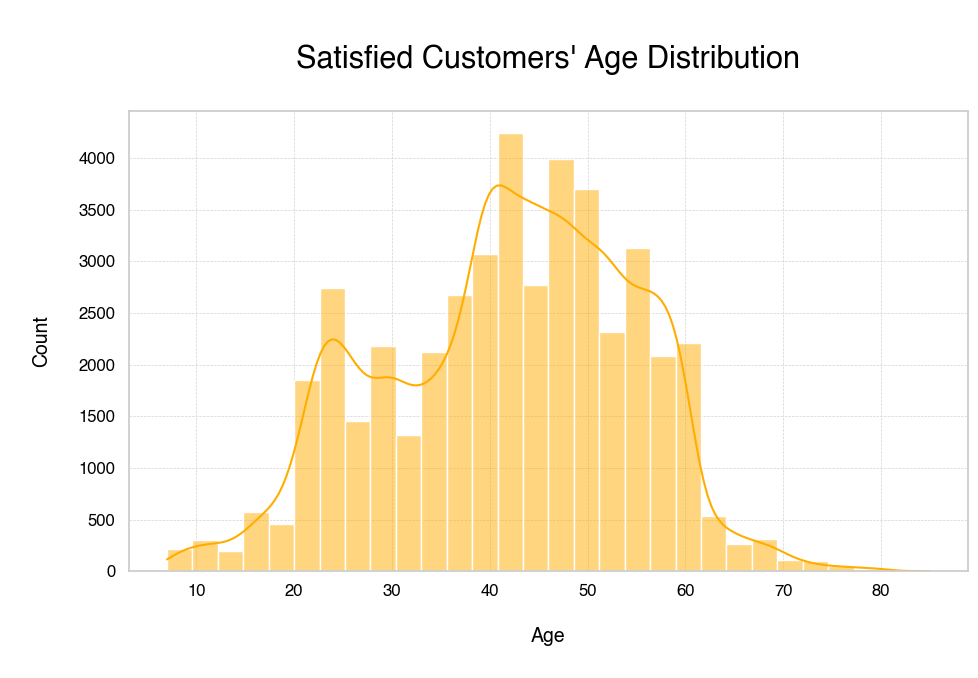

In [90]:
plt.figure(figsize=(10, 7))
sns.histplot(aps_df_satisfied, kde=True, color="#FFAD00", bins=30)
plt.title("\nSatisfied Customers' Age Distribution\n", fontsize=22, color=font_color, weight='bold')
plt.xlabel("\nAge\n", fontsize=14, color=font_color)
plt.ylabel("\nCount\n", fontsize=14, color=font_color)

plt.xticks(color=font_color, fontsize=12)
plt.yticks(color=font_color, fontsize=12)
plt.grid(color='#D3D3D3', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.show()

In [91]:
stats.anderson(aps_df_neutral_dissatisfied, dist="norm") # it's greater than the critical leve, rejeting H0 normal distribution


AndersonResult(statistic=326.02102553083387, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=37.56668761358039, scale=16.459825180906165)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

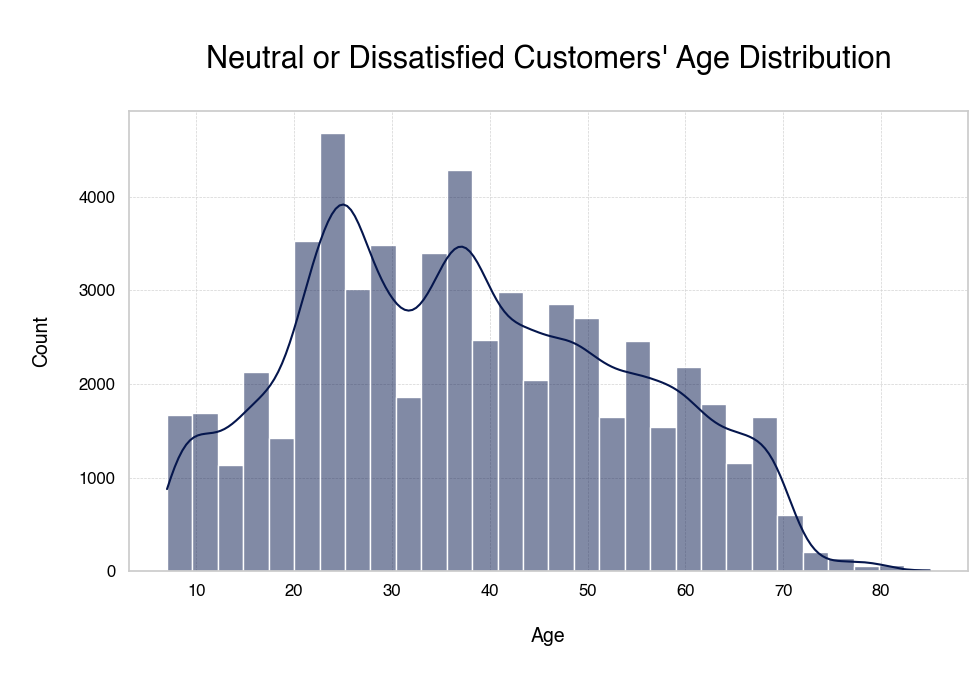

In [92]:
plt.figure(figsize=(10, 7))
sns.histplot(aps_df_neutral_dissatisfied, kde=True, color="#05164D", bins=30)

plt.title("\nNeutral or Dissatisfied Customers' Age Distribution\n", fontsize=22, color=font_color, weight='bold')
plt.xlabel("\nAge\n", fontsize=14, color=font_color)
plt.ylabel("\nCount\n", fontsize=14, color=font_color)

plt.xticks(color=font_color, fontsize=12)
plt.yticks(color=font_color, fontsize=12)
plt.grid(color='#D3D3D3', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.show()

In [93]:
# Performing non-parametric test Mann-Whitney
stats.mannwhitneyu(aps_df_satisfied, aps_df_neutral_dissatisfied, alternative='two-sided')

MannwhitneyuResult(statistic=1552716162.5, pvalue=0.0)

/var/folders/vj/svlcldb551lcrk9mrvs3273w0000gn/T/ipykernel_6515/2763363226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y='Age', data=aps_df, palette=lhs_palette, linewidth=0.8, linecolor='#9b9b9b')


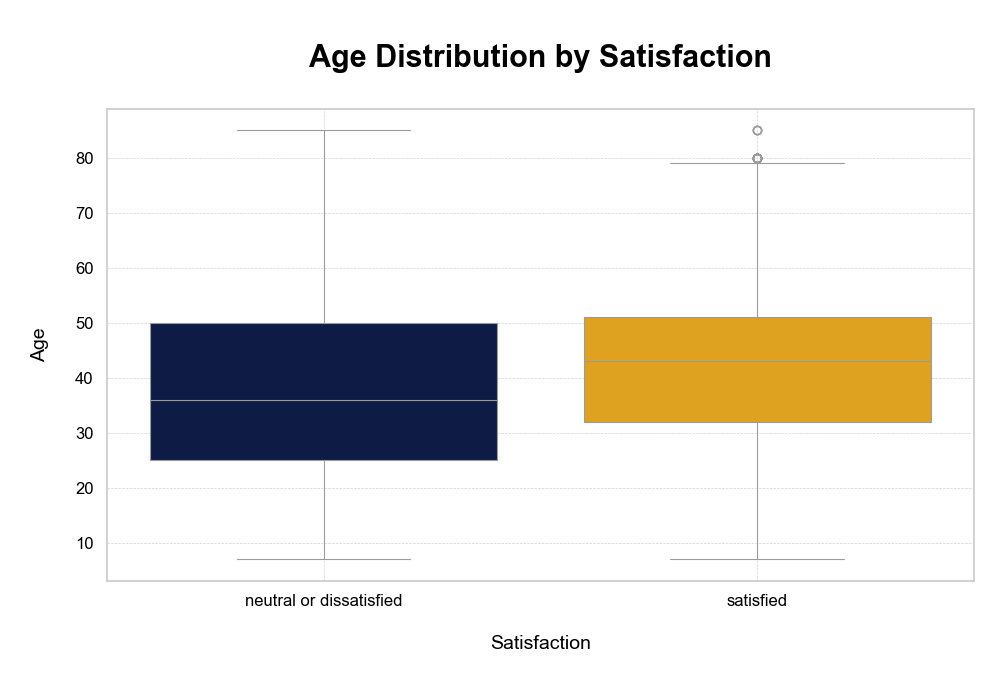

In [137]:
sns.set_theme(style="whitegrid")               

plt.figure(figsize=(10, 7))
sns.boxplot(x='satisfaction', y='Age', data=aps_df, palette=lhs_palette, linewidth=0.8, linecolor='#9b9b9b')

plt.title("\nAge Distribution by Satisfaction\n", fontsize=22, color=font_color, weight='bold')
plt.xlabel("\nSatisfaction\n", fontsize=14, color=font_color)
plt.ylabel("\nAge\n", fontsize=14, color=font_color)

plt.xticks(color=font_color, fontsize=12)
plt.yticks(color=font_color, fontsize=12)
plt.grid(color='#D3D3D3', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.show()

In [181]:
satisfaction_age__describe = aps_df.groupby('satisfaction')['Age'].describe()
satisfaction_age__describe

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
neutral or dissatisfied,58879.0,37.566688,16.459825,7.0,25.0,36.0,50.0,85.0
satisfied,45025.0,41.750583,12.767833,7.0,32.0,43.0,51.0,85.0


# 3. Do women find the seats more comfortable than men?

In [182]:
seat_comfort_describe = aps_df.groupby('Gender')['Seat comfort'].describe()
seat_comfort_describe

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,52727.0,3.473837,1.298940,0.0,3.0,4.0,5.0,5.0
Male,51177.0,3.403912,1.338615,1.0,2.0,4.0,5.0,5.0


In [183]:
aps_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [184]:
aps_df['Seat comfort'].unique()

array([5, 1, 2, 3, 4, 0])

In [185]:
aps_df_filtered = aps_df[aps_df['Seat comfort']!=0]
aps_df_male=aps_df_filtered[aps_df_filtered['Gender']=='Male']['Seat comfort']
aps_df_female=aps_df_filtered[aps_df_filtered['Gender']=='Female']['Seat comfort']

In [186]:
stats.anderson(aps_df_female, dist="norm") # it's greater than the critical leve, rejeting H0 normal distribution

AndersonResult(statistic=2291.0929043541837, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.473902818343891, scale=1.2988640058163647)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [187]:
stats.anderson(aps_df_male, dist="norm")  # it's greater than the critical leve, rejeting H0 normal distribution

AndersonResult(statistic=2168.1715078726265, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.4039119135549174, scale=1.3386147674958246)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [188]:
stats.mannwhitneyu(aps_df_female, aps_df_male, alternative="two-sided") # p < 0.05

MannwhitneyuResult(statistic=1384247682.0, pvalue=8.331350774937042e-14)

/var/folders/vj/svlcldb551lcrk9mrvs3273w0000gn/T/ipykernel_6515/556453665.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Seat comfort', data=aps_df_filtered, palette=lhs_palette, linewidth=0.8, linecolor='#9b9b9b')


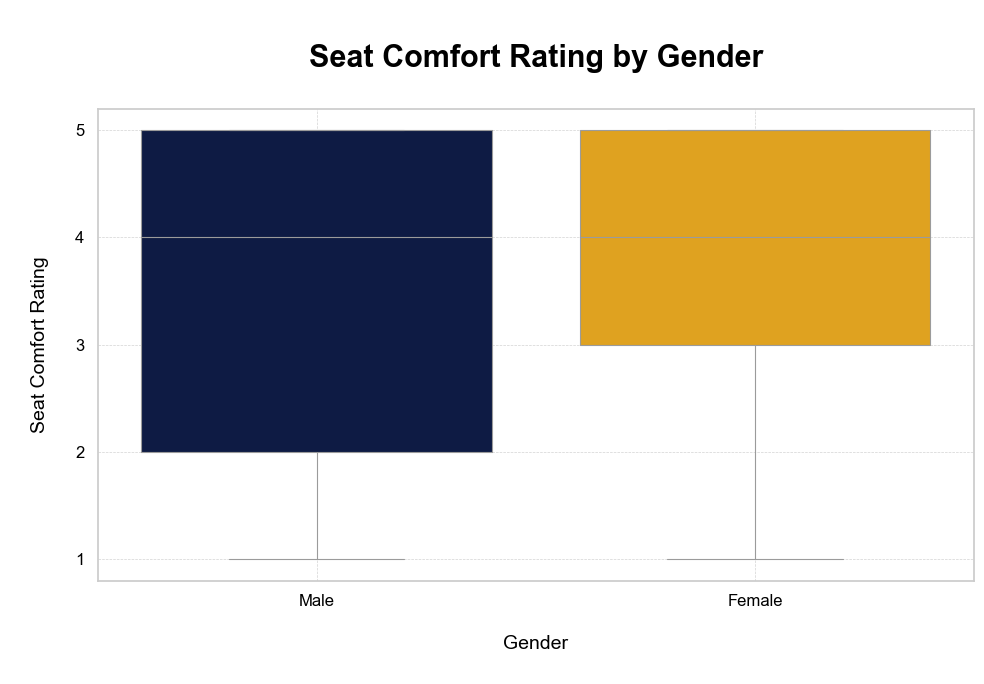

In [189]:
sns.set_theme(style="whitegrid")               

plt.figure(figsize=(10, 7))
sns.boxplot(x='Gender', y='Seat comfort', data=aps_df_filtered, palette=lhs_palette, linewidth=0.8, linecolor='#9b9b9b')

plt.title("\nSeat Comfort Rating by Gender\n", fontsize=22, color=font_color, weight='bold')
plt.xlabel("\nGender\n", fontsize=14, color=font_color)
plt.ylabel("\nSeat Comfort Rating\n", fontsize=14, color=font_color)

plt.xticks(color=font_color, fontsize=12)
plt.yticks(color=font_color, fontsize=12)
plt.yticks(ticks=range(int(aps_df_filtered['Seat comfort'].min()), int(aps_df_filtered['Seat comfort'].max()) + 1), color=font_color, fontsize=12)
plt.grid(color='#D3D3D3', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.show()

# 4. Does the rating of the ease of use of the online booking system decrease with the age of the passengers? 

In [190]:
aps_df_filtered = aps_df[aps_df['Ease of Online booking']!=0]
aps_df_online_booking = aps_df_filtered['Ease of Online booking']
print(aps_df_online_booking.unique())
aps_df_age = aps_df_filtered['Age']
print(aps_df_age.unique())

[3 2 5 4 1]
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 18 55 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]


In [191]:
stats.anderson(aps_df_online_booking, dist="Norm")

AndersonResult(statistic=3112.0268574841757, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=2.881328143074122, scale=1.2987725224611388)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [192]:
stats.anderson(aps_df_age, dist="Norm")

AndersonResult(statistic=280.2359753746132, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=39.45874448032027, scale=15.081090673186564)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [193]:
stats.spearmanr(aps_df_online_booking, aps_df_age, alternative="two-sided")

SignificanceResult(statistic=0.015120846378959439, pvalue=1.8616976849093008e-06)

In [194]:
stats.pearsonr(aps_df_online_booking, aps_df_age, alternative="two-sided") 

PearsonRResult(statistic=0.016401200052398535, pvalue=2.3202737646781199e-07)

In [195]:
aps_df_online_booking_Jittered = (
    aps_df_online_booking + np.random.uniform(-0.2, 0.2, size=len(aps_df_online_booking))
)

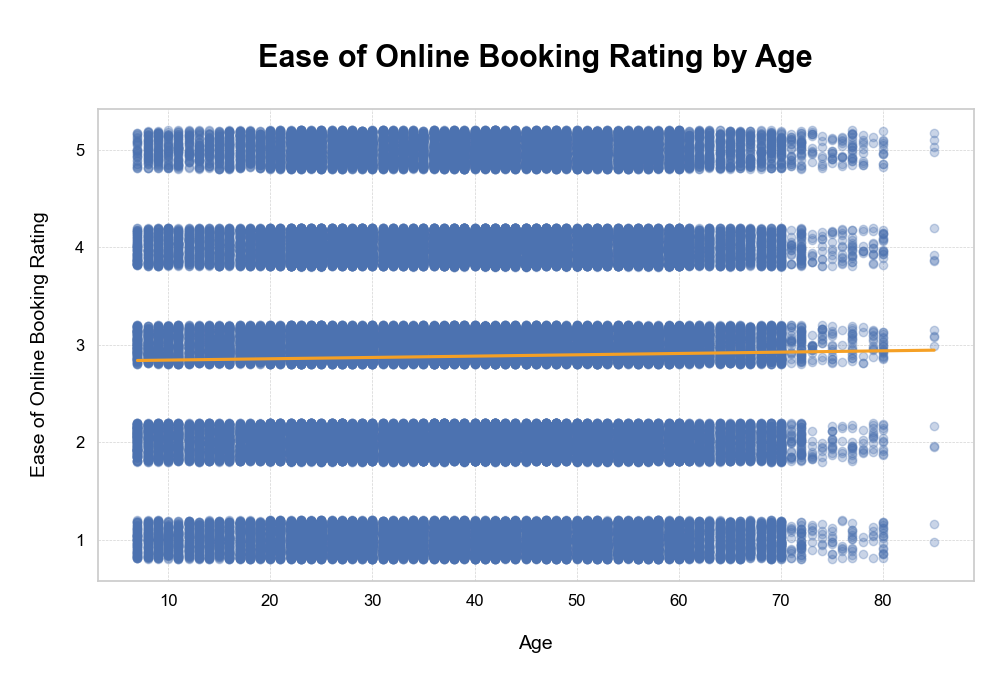

In [196]:
sns.set_theme(style="whitegrid")               

plt.figure(figsize=(10, 7))
sns.regplot(
    x=aps_df_age, 
    y=aps_df_online_booking_Jittered, 
    scatter_kws={'alpha': 0.3},
    line_kws={'color': '#f5a025'},  
    ci=None 
)
plt.title("\nEase of Online Booking Rating by Age\n", fontsize=22, color=font_color, weight='bold')
plt.xlabel("\nAge\n", fontsize=14, color=font_color)
plt.ylabel("\nEase of Online Booking Rating\n", fontsize=14, color=font_color)

plt.xticks(color=font_color, fontsize=12)
plt.yticks(color=font_color, fontsize=12)
plt.grid(color='#D3D3D3', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.show()

# 5. Does the leg room rating decrease as the flight distance increases?


In [197]:
aps_df['Leg room service'].unique()

array([3, 5, 4, 2, 1, 0])

In [198]:
aps_df['Flight Distance'].unique()

array([ 460,  235, 1142, ...,  974, 1479,  400])

In [199]:
aps_df_filtered = aps_df[aps_df['Leg room service']!=0]
aps_df_leg_room = aps_df_filtered['Leg room service']
aps_df_flight_dist = aps_df_filtered['Flight Distance']

In [200]:
stats.anderson(aps_df_leg_room, dist="Norm")

AndersonResult(statistic=3926.9887966310052, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.3663469719235826, scale=1.298936018475776)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [201]:
stats.anderson(aps_df_flight_dist, dist="Norm")

AndersonResult(statistic=4836.069767333378, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1191.7354590455566, scale=997.6029933591141)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [202]:
stats.spearmanr(aps_df_leg_room, aps_df_flight_dist, alternative="two-sided")

SignificanceResult(statistic=0.1140094160336845, pvalue=3.0979470703381437e-296)

In [203]:
aps_df_leg_room_Jittered = (
    aps_df_leg_room + np.random.uniform(-0.2, 0.2, size=len(aps_df_leg_room))
)

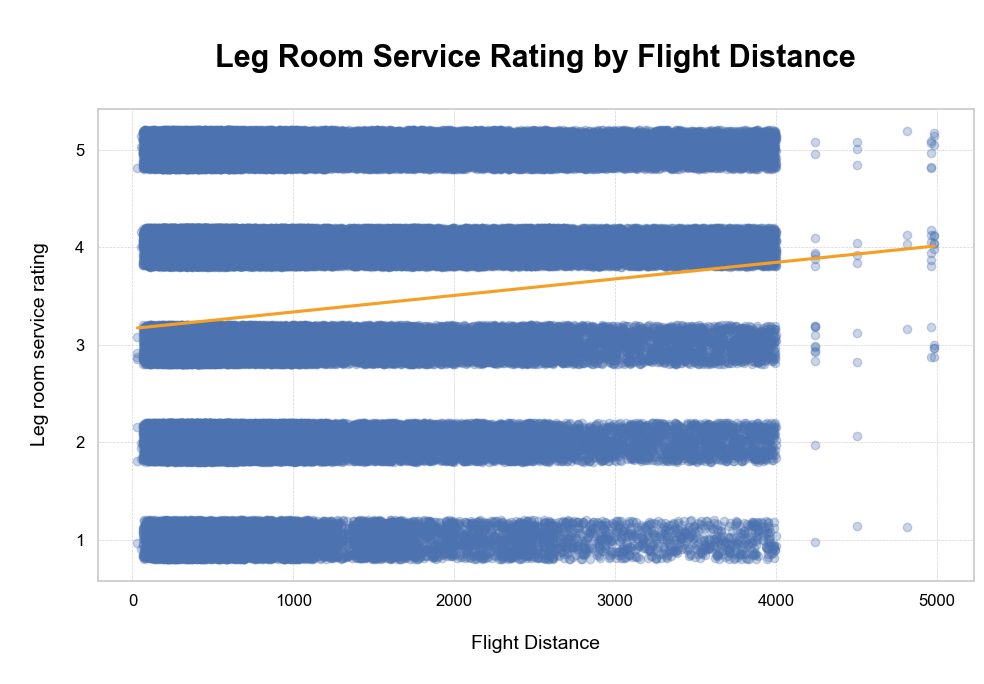

In [204]:
sns.set_theme(style="whitegrid")               

plt.figure(figsize=(10, 7))
sns.regplot(
    x=aps_df_flight_dist, 
    y=aps_df_leg_room_Jittered, 
    scatter_kws={'alpha': 0.3},
    line_kws={'color': '#f5a025'}, 
    ci=None 
)
plt.title("\nLeg Room Service Rating by Flight Distance\n", fontsize=22, color=font_color, weight='bold')
plt.xlabel("\nFlight Distance\n", fontsize=14, color=font_color)
plt.ylabel("\nLeg room service rating\n", fontsize=14, color=font_color)

plt.xticks(color=font_color, fontsize=12)
plt.yticks(color=font_color, fontsize=12)
plt.grid(color='#D3D3D3', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.show()

# 6. Are there significant differences in the rating of in-flight services between Business, Economy and Economy Plus class passengers?

In [205]:
aps_df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [206]:
aps_df['Inflight service'].unique()

array([5, 4, 3, 1, 2, 0])

In [207]:
aps_df_filtered = aps_df[aps_df['Inflight service']!=0]
aps_df_class_eco = aps_df_filtered[aps_df_filtered['Class']=='Eco']['Inflight service']
aps_df_class_eco_plus = aps_df_filtered[aps_df_filtered['Class']=='Eco Plus']['Inflight service']
aps_df_class_business = aps_df_filtered[aps_df_filtered['Class']=='Business']['Inflight service']


In [208]:
stats.anderson(aps_df_class_eco, dist="Norm")

AndersonResult(statistic=1852.1129428753047, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.463921275002674, scale=1.1970373465351507)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [209]:
stats.anderson(aps_df_class_eco_plus, dist="Norm")

AndersonResult(statistic=284.4557564142451, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.3884440886042166, scale=1.185922096182298)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [210]:
stats.anderson(aps_df_class_business, dist="Norm")

AndersonResult(statistic=2985.902102259439, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.8448109218315816, scale=1.1177881862868604)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [211]:
stats.kruskal(aps_df_class_eco, aps_df_class_eco_plus, aps_df_class_business)

KruskalResult(statistic=3210.746542756683, pvalue=0.0)

In [212]:
ratings = [aps_df_class_eco, aps_df_class_eco_plus, aps_df_class_business]
posthoc_analysis = posthoc_dunn(ratings, p_adjust = "bonferroni")
aps_df_posthoc = pd.DataFrame(posthoc_analysis.values, index=['Business', 'Economy', 'Economy Plus'], columns=['Business', 'Economy', 'Economy Plus'])
aps_df_posthoc

,Business,Economy,Economy Plus
Business,1.000000e+00,2.657230e-08,0.000000e+00
Economy,2.657230e-08,1.000000e+00,1.277098e-241
Economy Plus,0.000000e+00,1.277098e-241,1.000000e+00


In [213]:
inflight_service_describe = aps_df_filtered.groupby('Class')['Inflight service'].describe()
inflight_service_describe

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
Business,49662.0,3.844811,1.117788,1.0,3.0,4.0,5.0,5.0
Eco,46745.0,3.463921,1.197037,1.0,3.0,4.0,4.0,5.0
Eco Plus,7494.0,3.388444,1.185922,1.0,3.0,4.0,4.0,5.0


/var/folders/vj/svlcldb551lcrk9mrvs3273w0000gn/T/ipykernel_6515/1512942335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Inflight service', data=aps_df_filtered, palette=lhs_palette, linewidth=0.8, linecolor='#9b9b9b')


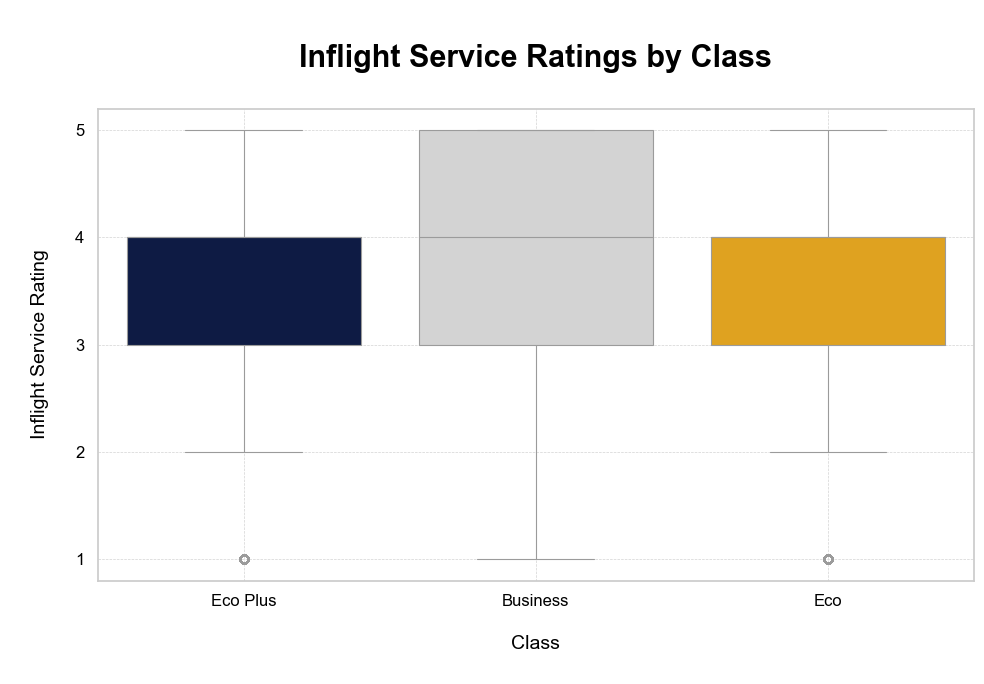

In [214]:
sns.set_theme(style="whitegrid")               

plt.figure(figsize=(10, 7))
sns.boxplot(x='Class', y='Inflight service', data=aps_df_filtered, palette=lhs_palette, linewidth=0.8, linecolor='#9b9b9b')

plt.title("\nInflight Service Ratings by Class\n", fontsize=22, color=font_color, weight='bold')
plt.xlabel("\nClass\n", fontsize=14, color=font_color)
plt.ylabel("\nInflight Service Rating\n", fontsize=14, color=font_color)


plt.xticks(color=font_color, fontsize=12)
plt.yticks(ticks=range(int(aps_df_filtered['Inflight service'].min()), int(aps_df_filtered['Inflight service'].max()) + 1), color=font_color, fontsize=12)
plt.grid(color='#D3D3D3', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.show()

# 7. Does the check-in rating differ between loyal and disloyal customers travelling in business class?

In [215]:
aps_df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [216]:
aps_df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [217]:
aps_df['Checkin service'].unique()

array([4, 1, 3, 5, 2, 0])

In [218]:
aps_df_filtered_1 = aps_df[aps_df['Checkin service']!=0]
aps_df_filtered_2 = aps_df_filtered_1[aps_df_filtered_1['Class']=='Business']
aps_df_loyal_business = aps_df_filtered_2[aps_df_filtered_2['Customer Type']=='Loyal Customer']['Checkin service']
aps_df_disloyal_business = aps_df_filtered_2[aps_df_filtered_2['Customer Type']=='disloyal Customer']['Checkin service']

In [219]:
stats.anderson(aps_df_loyal_business, dist="Norm")

AndersonResult(statistic=1640.39751912059, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.4852510163562447, scale=1.198400662794163)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [220]:
stats.anderson(aps_df_disloyal_business, dist="Norm")

AndersonResult(statistic=342.79230900568564, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.71479064709081, scale=1.0820600476166125)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [221]:
stats.mannwhitneyu(aps_df_loyal_business, aps_df_disloyal_business, alternative="two-sided")

MannwhitneyuResult(statistic=140106986.0, pvalue=2.265055311127063e-45)

/var/folders/vj/svlcldb551lcrk9mrvs3273w0000gn/T/ipykernel_6515/2369652267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer Type', y='Checkin service', data=aps_df_filtered_2, palette=lhs_palette, linewidth=0.8, linecolor='#9b9b9b')


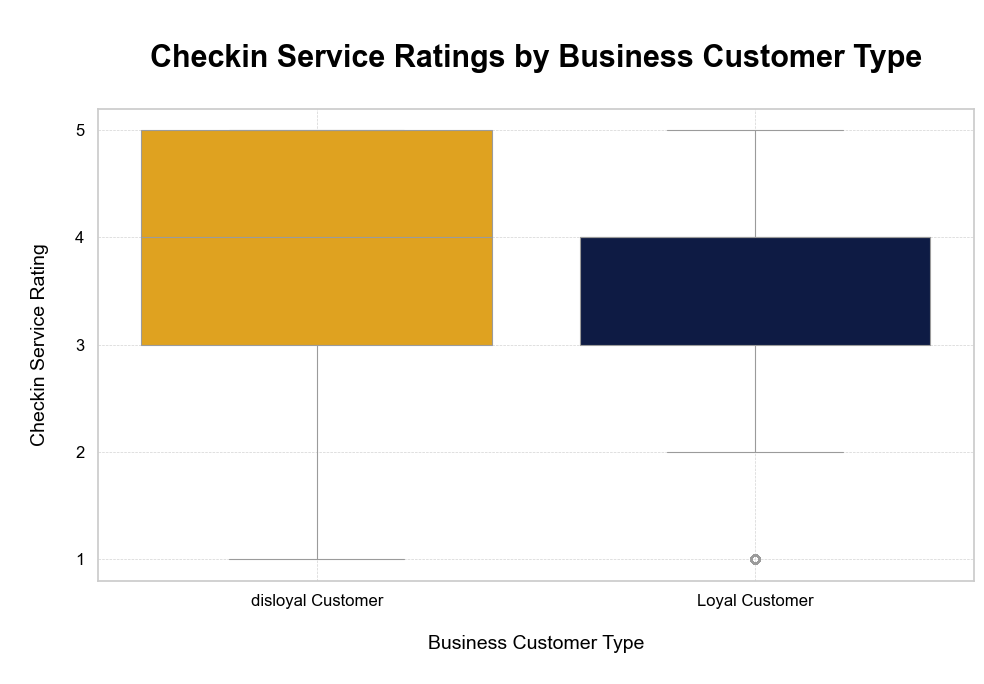

In [222]:
sns.set_theme(style="whitegrid")               

plt.figure(figsize=(10, 7))
sns.boxplot(x='Customer Type', y='Checkin service', data=aps_df_filtered_2, palette=lhs_palette, linewidth=0.8, linecolor='#9b9b9b')

plt.title("\nCheckin Service Ratings by Business Customer Type\n", fontsize=22, color=font_color, weight='bold')
plt.xlabel("\nBusiness Customer Type\n", fontsize=14, color=font_color)
plt.ylabel("\nCheckin Service Rating\n", fontsize=14, color=font_color)


plt.xticks(color=font_color, fontsize=12)
plt.yticks(ticks=range(int(aps_df_filtered_2['Checkin service'].min()), int(aps_df_filtered_2['Checkin service'].max()) + 1), color=font_color, fontsize=12)
plt.grid(color='#D3D3D3', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.show()

In [223]:
inflight_service_describe = aps_df_filtered_2.groupby('Customer Type')['Checkin service'].describe()
inflight_service_describe

,count,mean,std,min,25%,50%,75%,max
Customer Type,,,,,,,,
Loyal Customer,42308.0,3.485251,1.198401,1.0,3.0,4.0,4.0,5.0
disloyal Customer,7356.0,3.714791,1.082060,1.0,3.0,4.0,5.0,5.0
